# Lesson 3 
    0) Adding all the necessary prerequesites for this python lab

In [3]:
import numpy as np
from datetime import *
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings


    1) Using basic Python operators to find the number of seconds in the month of June. Using basic Python operators to find the number of seconds that lapsed between 14 Aug, 0930 and 1 June, 1200. I will use the datetime date package to find the number of days that elapse

In [6]:
30*24*60*60

2592000

In [7]:
(date(2019,6,1)-date(2018, 8, 14)).days*24*60*60+2.5*60*60

25151400.0

    2) Import a table and find the population in 2016, the population growth between 1950 and 2015 and the annual growth rates over the course of the dataset

In [8]:
population = Table.read_table('world_population.csv')

        a) The population in 2015 is

In [13]:
population.take(population.num_rows-1).show()

Population
7256490011


        b) Find difference in population between 1950 and 2015

In [18]:
population.column(0).item(-1)-population.column(0).item(0)

4698861357

        C) Find the average annual growth rate over the course of the dataset

In [30]:
((population.column(0).item(-1)/population.column(0).item(0))**(1/65) - 1)*100

1.617270380658975

    4) Let's have some fun with titanic data

In [68]:
# Initialize titanic data into a table from the given csv link
titanicData = Table.read_table('https://raw.githubusercontent.com/oikobill/Kaggle/master/Titanic/data/train.csv')
titanicData.show(5)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S


In [69]:
# relabel the column named pClass to passenger_class
titanicData.relabel(2, 'passenger_class')

# Creating a new column ‘family_size’ that adds the number of siblings/spouses, ‘SibSp’, to the number of children, ‘Parch’.

# Create an array that is SibSP and Parch added together
newColumn = titanicData.column(6) + titanicData.column(7)

# Append the column with the new name
titanicData.append_column('family_size', newColumn)

titanicData.show(5)

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S,0


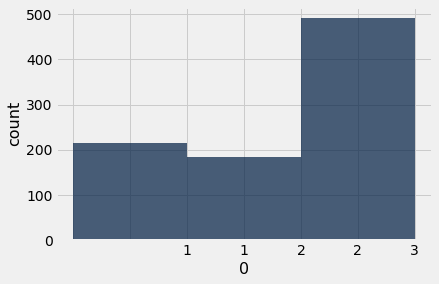

In [70]:
# Create a barplot of number of passengers, broken down by passenger class.

# Group the passenger_class (1,2,3)
dataForP1 = titanicData.group('passenger_class')
 
# plot the groupings using the bar function
dataForP1.bar(column_for_categories=0, select=None, overlay=True)



In [76]:
# Sort the data by age and show the youngest 5 passengers.
titanicData.sort(5).show(5)


PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,nan,C,1
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5,nan,S,2
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,nan,C,3
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,nan,C,3
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29,nan,S,2


In [85]:
#Now sort by age from oldest to youngest and show the oldest 5 passengers.

#remove all the nan entries and show the oldest 5 passengers
ascending = titanicData.sort(5,'ascending').where('Age', are.not_above(80))
ascending.show(5)

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30,A23,S,0
852,0,3,"Svensson, Mr. Johan",male,74,0,0,347060,7.775,nan,S,0
494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,nan,C,0
97,0,1,"Goldschmidt, Mr. George B",male,71,0,0,PC 17754,34.6542,A5,C,0
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.75,nan,Q,0


In [100]:
#Find the survival rate for passengers of the Titanic, broken down by passenger class.

simplifiedTable = titanicData.drop(0,3,4,5,6,7,8,9,10,11,12)
simplifiedTable.show(5)

usefulData = simplifiedTable.groups(['Survived','passenger_class']).exclude(range(3))

survivalRates = usefulData.column(2)/dataForP1.column(1)

Survived,passenger_class
0,3
1,1
1,3
1,1
0,3


In [ ]:
#New Questions